In [1]:
include("../src/debruijnnets.jl")
include("../src/motifs.jl")
include("../src/motif_embeddings.jl")

walks_from_ngram

In [2]:
;cat test.txt

a,b,c
a,b,c
a,b,c
a,c,d
a,c,d
c,d,b
b,a,d,c,a,d
d,a,c,b,d,f
d,a,c,b,d,f,b,a,d,c,a,d

In [3]:
frequency = false
all_walks, fo_map = walks_from_ngram("test.txt", frequency)
walks = Vector{Tuple}()
weights = Vector{Int64}()
for (walk, weight) in all_walks
    push!(walks, walk)
    push!(weights, weight)
end

In [4]:
empirical_motifs, motif_edges = exclusive_motifs(walks, [2,3]; weights=weights)

(Dict{Any, Any}(('a', 'b', 'c', 'd') => 10.0, ('a', 'b', 'c', 'a') => 5.0, ('a', 'b', 'c') => 6.0), Dict{Any, Any}(('a', 'b', 'c', 'd') => Set(Any[4, 6, 2]), ('a', 'b', 'c', 'a') => Set(Any[4, 6]), ('a', 'b', 'c') => Set(Any[5, 3, 1])))

In [5]:
rev_fo_map = Dict(val=>key for (key,val) in fo_map)

Dict{Int64, String} with 5 entries:
  5 => "f"
  4 => "d"
  2 => "b"
  3 => "c"
  1 => "a"

In [6]:
empirical_motifs

Dict{Any, Any} with 3 entries:
  ('a', 'b', 'c', 'd') => 10.0
  ('a', 'b', 'c', 'a') => 5.0
  ('a', 'b', 'c')      => 6.0

In [7]:
motif_edges

Dict{Any, Any} with 3 entries:
  ('a', 'b', 'c', 'd') => Set(Any[4, 6, 2])
  ('a', 'b', 'c', 'a') => Set(Any[4, 6])
  ('a', 'b', 'c')      => Set(Any[5, 3, 1])

In [8]:
N = length(fo_map)
weighted = true
embedding, embedding_label = positional_embedding(motif_edges, walks, weights, weighted, N)

('a', 'b', 'c')(3, 4, 2)
('a', 'b', 'c')(3, 4, 2)
('a', 'b', 'c')(3, 4, 2)
('a', 'b', 'c')(1, 2, 3)
('a', 'b', 'c')(1, 2, 3)
('a', 'b', 'c')(1, 2, 3)
('a', 'b', 'c')(1, 3, 4)
('a', 'b', 'c')(1, 3, 4)
('a', 'b', 'c')(1, 3, 4)
('a', 'b', 'c', 'd')(4, 1, 3, 2, 4, 5, 2, 1, 4, 3, 1, 4)
('a', 'b', 'c', 'd')(4, 1, 3, 2, 4, 5, 2, 1, 4, 3, 1, 4)
('a', 'b', 'c', 'd')(4, 1, 3, 2, 4, 5, 2, 1, 4, 3, 1, 4)
('a', 'b', 'c', 'd')(4, 1, 3, 2, 4, 5, 2, 1, 4, 3, 1, 4)
('a', 'b', 'c', 'd')(2, 1, 4, 3, 1, 4)
('a', 'b', 'c', 'd')(2, 1, 4, 3, 1, 4)
('a', 'b', 'c', 'd')(2, 1, 4, 3, 1, 4)
('a', 'b', 'c', 'd')(2, 1, 4, 3, 1, 4)
('a', 'b', 'c', 'd')(4, 1, 3, 2, 4, 5)
('a', 'b', 'c', 'd')(4, 1, 3, 2, 4, 5)
('a', 'b', 'c', 'd')(4, 1, 3, 2, 4, 5)
('a', 'b', 'c', 'd')(4, 1, 3, 2, 4, 5)
('a', 'b', 'c', 'a')(4, 1, 3, 2, 4, 5, 2, 1, 4, 3, 1, 4)
('a', 'b', 'c', 'a')(4, 1, 3, 2, 4, 5, 2, 1, 4, 3, 1, 4)
('a', 'b', 'c', 'a')(4, 1, 3, 2, 4, 5, 2, 1, 4, 3, 1, 4)
('a', 'b', 'c', 'a')(4, 1, 3, 2, 4, 5, 2, 1, 4, 3, 1, 4)
('a', '

([5.0 0.0 … 0.0 0.0; 0.0 3.0 … 0.0 1.0; … ; 0.0 1.0 … 1.0 0.0; 0.0 0.0 … 0.0 0.0], ["a-1", "b-1", "c-1", "a-2", "b-2", "c-2", "d-2", "a-3", "b-3", "c-3", "a-3"])

In [9]:
embedding[1, :]

11-element Vector{Float64}:
 5.0
 0.0
 0.0
 0.0
 3.0
 0.0
 0.0
 0.0
 2.0
 0.0
 0.0

In [10]:
using Plots

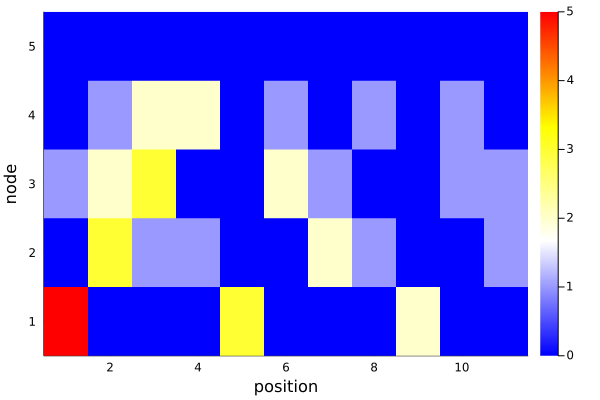

In [11]:
heatmap(embedding, ylabel="node", xlabel="position", c=cgrad([:blue, :white, :yellow, :red]))

In [12]:
using CSV, Tables

In [13]:
CSV.write("test_embedding.csv", Tables.table(embedding); header=embedding_label)

"test_embedding.csv"